# Quantify neuron nonlinear correlation strength to eye and belief task variables

## Load data

### imports

In [7]:
import pickle
import torch
import numpy as np
import cebra
# from cebra import CEBRA
# import pandas as pd
import tempfile
from pathlib import Path
import sys
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
# this device
from pathlib import Path
import configparser
config = configparser.ConfigParser()
config.read_file(open('../../privateconfig'))
resdir = Path(config['Datafolder']['data'])
workdir = Path(config['Codefolder']['workspace'])
os.chdir(workdir)
from notification import notify


In [3]:
# this doc
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression

### data

In [4]:
# use my data
with open(f'{workdir}/test/neural/cebra/test', 'rb') as f:
    (neural_data, continuous_label) = pickle.load(f)
neural_data.shape, continuous_label.shape

((18985, 94), (18985, 13))

In [12]:
thisyname=[
    'sess_latentff_hori',
    'sess_latentff_vert',
    'sess_eye_hori',
    'sess_eye_vert',
    'sess_latentb_hori',
    'sess_latentb_vert',
    '(sess_angle_from_start)',
    ('sess_ll_t'),
    ('sess_t'),
    ('sess_err'),
    ('sess_err_belief'),
    ('sess_angle_from_start_belief'),
    (('belief_heading')), # belief heading
]


## Nonlinear correlation



### background



Spearman's Rank Correlation:

Spearman's rank correlation coefficient assesses the strength and direction of association between two variables by ranking their values and computing the correlation between the ranks.
It measures how well the relationship between two variables can be described using a monotonic function, regardless of the specific form of the relationship.
The coefficient ranges from -1 to 1, where:
1 indicates a perfect positive monotonic relationship (as one variable increases, the other also increases).
-1 indicates a perfect negative monotonic relationship (as one variable increases, the other decreases).
0 indicates no monotonic relationship between the variables.
The p-value associated with Spearman's correlation test indicates the probability of obtaining the observed correlation coefficient if the true correlation coefficient were zero (null hypothesis).
Common interpretations of the coefficient magnitude:
0.00 to 0.19: Very weak correlation
0.20 to 0.39: Weak correlation
0.40 to 0.59: Moderate correlation
0.60 to 0.79: Strong correlation
0.80 to 1.00: Very strong correlation
Kendall's Tau:

Kendall's Tau is another non-parametric measure of rank correlation similar to Spearman's correlation.
It measures the similarity of the orderings of the data when ranked by each of the quantities.
The coefficient also ranges from -1 to 1, with similar interpretations as Spearman's correlation.
Kendall's Tau is particularly useful when dealing with data with tied ranks.
The p-value associated with Kendall's Tau test has a similar interpretation to Spearman's correlation.
Mutual Information:

Mutual information measures the amount of information obtained about one variable through observing another variable.
It quantifies the dependence between two variables and is sensitive to both linear and nonlinear relationships.
It ranges from 0 to positive infinity, where higher values indicate stronger dependence between the variables.
However, mutual information does not have a standardized scale for interpretation like Spearman's correlation and Kendall's Tau. Its interpretation depends on the specific context and application.
Generally, higher mutual information values indicate greater association or dependence between the variables.
In summary, higher absolute values of Spearman's correlation coefficient and Kendall's Tau indicate stronger monotonic relationships between variables, while higher mutual information values indicate stronger dependence between variables, whether linear or nonlinear. The interpretation of the correlation coefficients also depends on the context and domain of the data being analyzed.

### neural to eye belief
we have 94 neurons and we check their score to the task variables.
the result will be in a matrix.

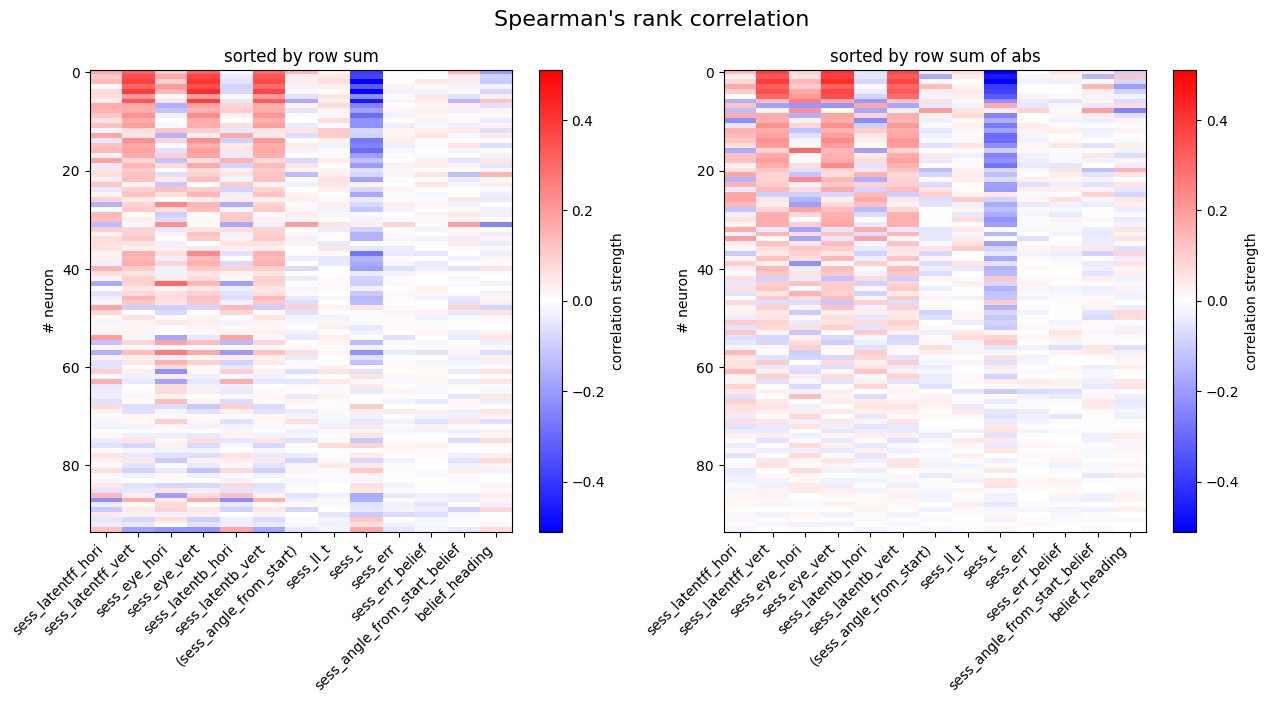

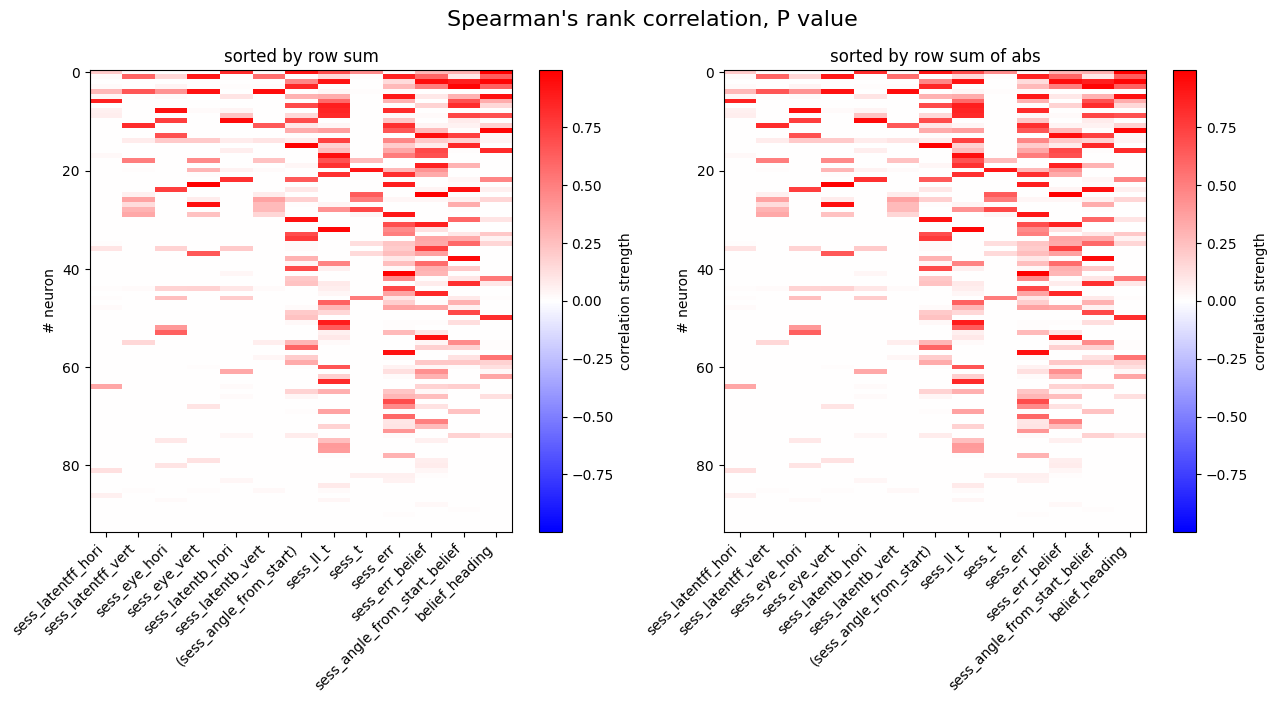

In [36]:
# Spearman's rank correlation
res = np.zeros((neural_data.shape[1], continuous_label.shape[1]))
resp = np.zeros((neural_data.shape[1], continuous_label.shape[1]))

for i in range(neural_data.shape[1]):
    for j in range(continuous_label.shape[1]):
        spearman_corr, spearman_p_value = spearmanr(neural_data[:,i], continuous_label[:,j])
        res[i,j]=spearman_corr
        resp[i,j]=spearman_p_value
        
data_matrix = res

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
ax = axs[0]
row_sums = np.sum(data_matrix, axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')


ax = axs[1]
row_sums = np.sum(np.abs(data_matrix), axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum of abs')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')

plt.suptitle("Spearman's rank correlation",fontsize=16)
plt.show()

data_matrix = resp

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
ax = axs[0]
row_sums = np.sum(data_matrix, axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')


ax = axs[1]
row_sums = np.sum(np.abs(data_matrix), axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum of abs')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')

plt.suptitle("Spearman's rank correlation, P value",fontsize=16)
plt.show()

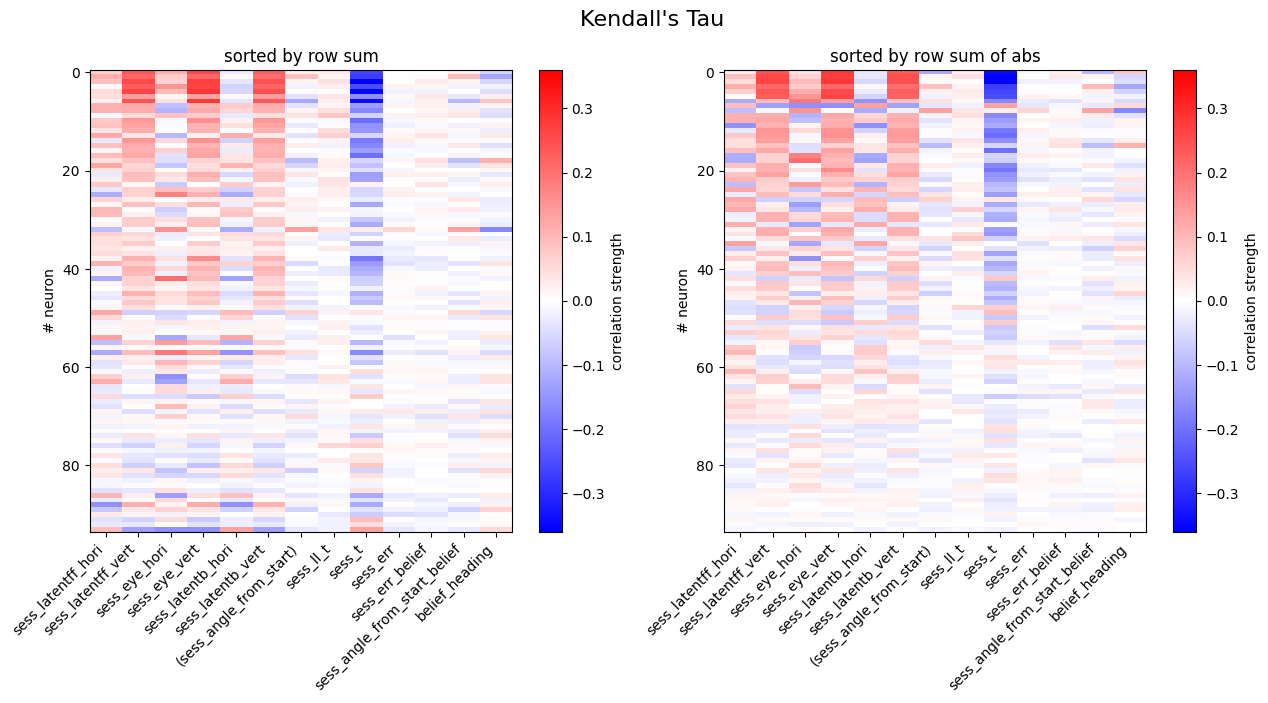

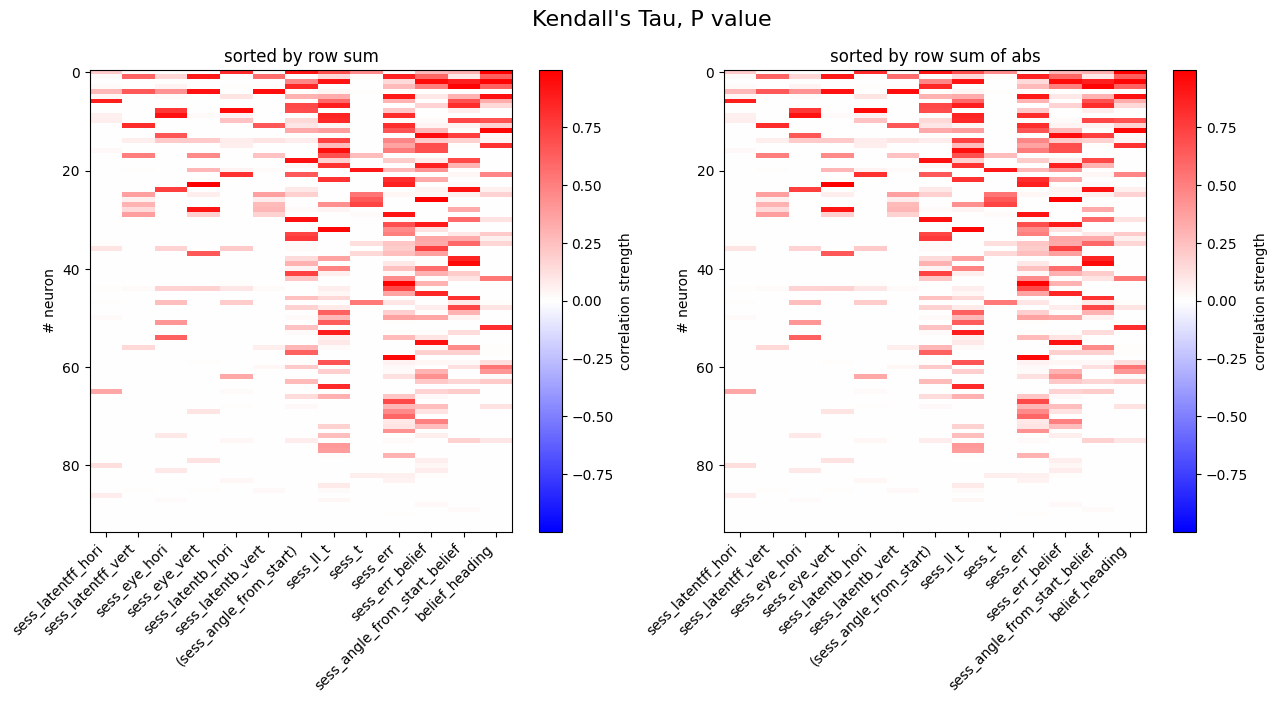

In [37]:
# Kendall's Tau
res = np.zeros((neural_data.shape[1], continuous_label.shape[1]))
resp = np.zeros((neural_data.shape[1], continuous_label.shape[1]))

for i in range(neural_data.shape[1]):
    for j in range(continuous_label.shape[1]):
        kendall_tau, kendall_p_value = kendalltau(neural_data[:,i], continuous_label[:,j])
        res[i,j]=kendall_tau
        resp[i,j]=kendall_p_value


data_matrix = res

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
ax = axs[0]
row_sums = np.sum(data_matrix, axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')


ax = axs[1]
row_sums = np.sum(np.abs(data_matrix), axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum of abs')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')

plt.suptitle("Kendall's Tau",fontsize=16)
plt.show()



data_matrix = resp

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
ax = axs[0]
row_sums = np.sum(data_matrix, axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')


ax = axs[1]
row_sums = np.sum(np.abs(data_matrix), axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum of abs')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')

plt.suptitle("Kendall's Tau, P value",fontsize=16)
plt.show()



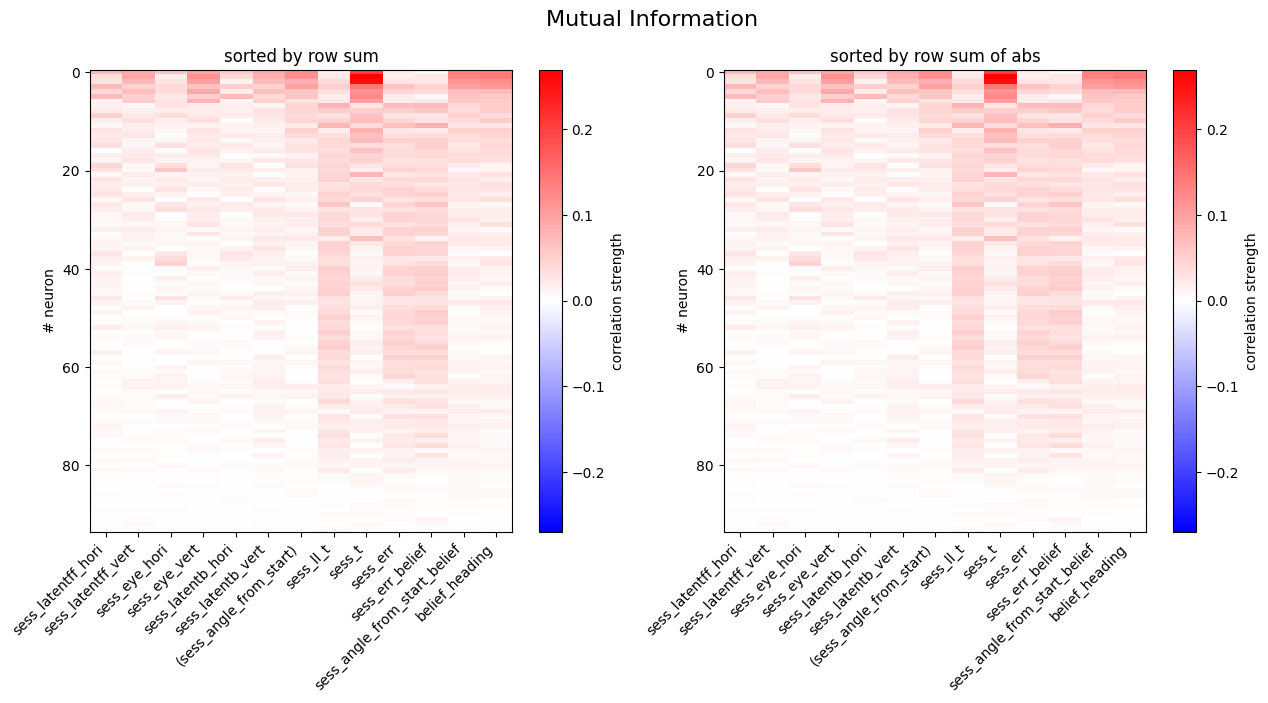

In [33]:
# Mutual Information
res = np.zeros((neural_data.shape[1], continuous_label.shape[1]))
resp = np.zeros((neural_data.shape[1], continuous_label.shape[1]))

for i in range(neural_data.shape[1]):
    for j in range(continuous_label.shape[1]):
        mi = mutual_info_regression(neural_data[:,i].reshape(-1,1), continuous_label[:,j])
        res[i,j]=mi[0]


data_matrix = res

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
ax = axs[0]
row_sums = np.sum(data_matrix, axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')


ax = axs[1]
row_sums = np.sum(np.abs(data_matrix), axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr', vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum of abs')
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')

plt.suptitle("Mutual Information",fontsize=16)
plt.show()


### short conclusion:
the result shows that the session timer has the strongest correlation to neural activity. from P value, we can confirm this is non trival.

other than that, we also found verticle direction shows strong correlation. this is because the verticle direction is strongly correlated to the timer. near finish, the verticle is high angle.

### count number of neurons that tune to each variable

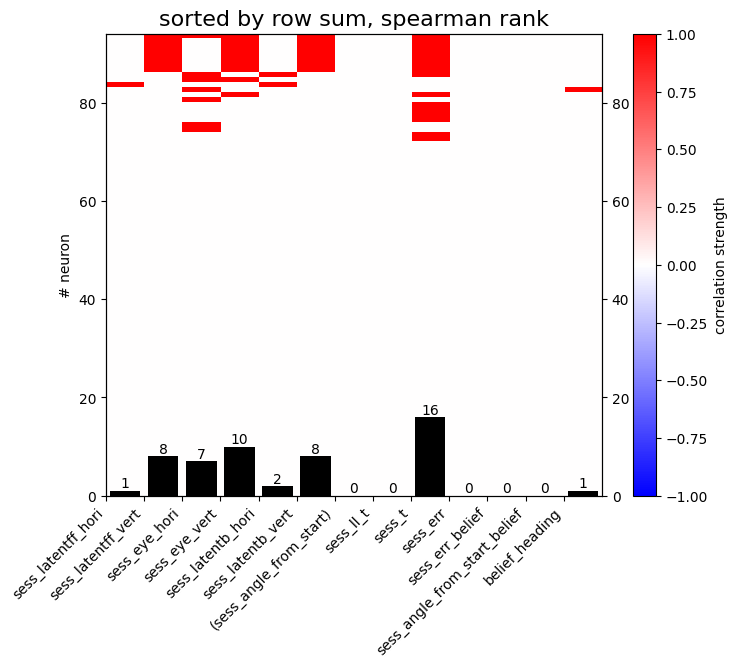

In [126]:
# Spearman's rank correlation
correlation_threshold=0.2 # 0.4 is consider to have weak corr

res = np.zeros((neural_data.shape[1], continuous_label.shape[1]))
resp = np.zeros((neural_data.shape[1], continuous_label.shape[1]))

for i in range(neural_data.shape[1]):
    for j in range(continuous_label.shape[1]):
        spearman_corr, spearman_p_value = spearmanr(neural_data[:,i], continuous_label[:,j])
        res[i,j]=spearman_corr
        resp[i,j]=spearman_p_value
        
data_matrix = res
data_matrix[((data_matrix > -correlation_threshold) & (data_matrix < correlation_threshold))] = 0
data_matrix[data_matrix != 0] = 1

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
row_sums = np.sum(data_matrix, axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr',extent=(0, data_matrix.shape[1], 0, data_matrix.shape[0]), vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum, spearman rank', fontsize=16)
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')


ax1 = ax.twinx()

bars=ax1.bar(np.arange(continuous_label.shape[1])+0.5, np.sum(data_matrix, axis=0), color='black', alpha=1, align='center')
ax1.set_ylim(ax.get_ylim())

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, '%.f' % height, ha='center', va='bottom')

ax1.xaxis.set_ticks_position('bottom')

plt.show()

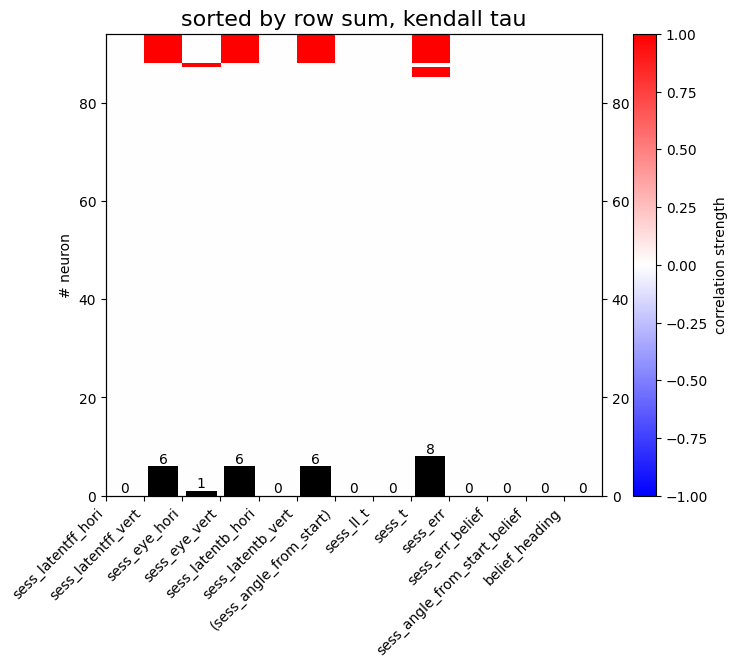

In [125]:
# kendalltau
correlation_threshold=0.2 # 0.4 is consider to have weak corr

res = np.zeros((neural_data.shape[1], continuous_label.shape[1]))
resp = np.zeros((neural_data.shape[1], continuous_label.shape[1]))

for i in range(neural_data.shape[1]):
    for j in range(continuous_label.shape[1]):
        spearman_corr, spearman_p_value = kendalltau(neural_data[:,i], continuous_label[:,j])
        res[i,j]=spearman_corr
        resp[i,j]=spearman_p_value
        
data_matrix = res
data_matrix[((data_matrix > -correlation_threshold) & (data_matrix < correlation_threshold))] = 0
data_matrix[data_matrix != 0] = 1

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
row_sums = np.sum(data_matrix, axis=1)
sortind = np.argsort(row_sums)[::-1]
data_matrix = data_matrix[sortind]
im = ax.imshow(data_matrix, aspect='auto', cmap='bwr',extent=(0, data_matrix.shape[1], 0, data_matrix.shape[0]), vmin=-
               np.max(np.abs(data_matrix)), vmax=np.max(np.abs(data_matrix)))
cbar = fig.colorbar(im, ax=ax, label='correlation strength')
ax.set_title('sorted by row sum, kendall tau', fontsize=16)
ax.set_ylabel('# neuron')
ax.set_xticks(np.arange(continuous_label.shape[1]))
ax.set_xticklabels(thisyname, rotation=45, ha='right')


ax1 = ax.twinx()

bars=ax1.bar(np.arange(continuous_label.shape[1])+0.5, np.sum(data_matrix, axis=0), color='black', alpha=1, align='center')
ax1.set_ylim(ax.get_ylim())

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, '%.f' % height, ha='center', va='bottom')

ax1.xaxis.set_ticks_position('bottom')

plt.show()

## Based on Cebra result

### load cebra